In [ ]:
# Step 1: Download and install the TA-Lib library
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && sudo make install

# Step 2: Install the TA-Lib Python wrapper
!pip install ta-lib

--2024-05-25 06:03:15--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-25 06:03:16--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-25 06:03:16--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
# Load the dataset
file_path = '/content/BTC-USD.csv'
data = pd.read_csv(file_path)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
# Columns to add lags for
cols_to_lag = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in cols_to_lag:
  data[col] = pd.to_numeric(data[col])
  for lag in range(1, 8):
        data[f'{col}_lag{lag}'] = data[col].shift(lag)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,465.864014,NaN,NaN,...,NaN,NaN,NaN,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,456.859985,465.864014,NaN,...,NaN,NaN,NaN,34483200.0,21056800.0,NaN,NaN,NaN,NaN,NaN
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,424.102997,456.859985,465.864014,...,NaN,NaN,NaN,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN,NaN
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,394.673004,424.102997,456.859985,...,NaN,NaN,NaN,36863600.0,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
3524,5/11/2024,60793.35547,61451.15234,60492.62500,60793.71094,60793.71094,1.384227e+10,63055.19141,61191.19922,62332.64063,...,63161.94922,64031.13281,63891.47266,2.780495e+10,2.545334e+10,2.608817e+10,2.593073e+10,2.869793e+10,1.829616e+10,2.062048e+10
3525,5/12/2024,60793.50391,61818.15625,60632.60156,61448.39453,61448.39453,1.380046e+10,60793.35547,63055.19141,61191.19922,...,62334.81641,63161.94922,64031.13281,1.384227e+10,2.780495e+10,2.545334e+10,2.608817e+10,2.593073e+10,2.869793e+10,1.829616e+10
3526,5/13/2024,61451.21875,63422.66016,60769.83984,62901.44922,62901.44922,2.788918e+10,60793.50391,60793.35547,63055.19141,...,61187.94141,62334.81641,63161.94922,1.380046e+10,1.384227e+10,2.780495e+10,2.545334e+10,2.608817e+10,2.593073e+10,2.869793e+10
3527,5/14/2024,62900.77344,63092.12500,61123.76563,61552.78906,61552.78906,2.818627e+10,61451.21875,60793.50391,60793.35547,...,63049.96094,61187.94141,62334.81641,2.788918e+10,1.380046e+10,1.384227e+10,2.780495e+10,2.545334e+10,2.608817e+10,2.593073e+10
3528,5/15/2024,61549.57813,64572.18750,61358.83984,64572.18750,64572.18750,3.109905e+10,62900.77344,61451.21875,60793.50391,...,60792.77734,63049.96094,61187.94141,2.818627e+10,2.788918e+10,1.380046e+10,1.384227e+10,2.780495e+10,2.545334e+10,2.608817e+10


In [ ]:
# Save the updated dataset to a new CSV file
data.to_csv('/content/BTC-USD_with_lags.csv', index=False)


In [ ]:
# Load the dataset
file_path = '/content/BTC-USD_with_lags.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,465.864014,NaN,NaN,...,NaN,NaN,NaN,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,456.859985,465.864014,NaN,...,NaN,NaN,NaN,34483200.0,21056800.0,NaN,NaN,NaN,NaN,NaN
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,424.102997,456.859985,465.864014,...,NaN,NaN,NaN,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN,NaN
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,394.673004,424.102997,456.859985,...,NaN,NaN,NaN,36863600.0,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN


In [ ]:
# Split the dataset into training and test sets
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train_df = df[:split_index]
test_df = df[split_index:]

# Save the split datasets to CSV files
train_df.to_csv('/content/BTC-USD_train.csv', index=True)
test_df.to_csv('/content/BTC-USD_test.csv', index=True)

print("Training and test datasets saved successfully.")

Training and test datasets saved successfully.


# **Data Preprocessing**

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
missing_values

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         1
Open_lag2         2
Open_lag3         3
Open_lag4         4
Open_lag5         5
Open_lag6         6
Open_lag7         7
High_lag1         1
High_lag2         2
High_lag3         3
High_lag4         4
High_lag5         5
High_lag6         6
High_lag7         7
Low_lag1          1
Low_lag2          2
Low_lag3          3
Low_lag4          4
Low_lag5          5
Low_lag6          6
Low_lag7          7
Close_lag1        1
Close_lag2        2
Close_lag3        3
Close_lag4        4
Close_lag5        5
Close_lag6        6
Close_lag7        7
Adj Close_lag1    1
Adj Close_lag2    2
Adj Close_lag3    3
Adj Close_lag4    4
Adj Close_lag5    5
Adj Close_lag6    6
Adj Close_lag7    7
Volume_lag1       1
Volume_lag2       2
Volume_lag3       3
Volume_lag4       4
Volume_lag5       5
Volume_lag6       6
Volume_lag7       7
dtype: int64

In [ ]:
# Replace missing values with 0
df.fillna(0, inplace=True)

In [ ]:
# Handle missing values by forward filling, then back filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_values

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         0
Open_lag2         0
Open_lag3         0
Open_lag4         0
Open_lag5         0
Open_lag6         0
Open_lag7         0
High_lag1         0
High_lag2         0
High_lag3         0
High_lag4         0
High_lag5         0
High_lag6         0
High_lag7         0
Low_lag1          0
Low_lag2          0
Low_lag3          0
Low_lag4          0
Low_lag5          0
Low_lag6          0
Low_lag7          0
Close_lag1        0
Close_lag2        0
Close_lag3        0
Close_lag4        0
Close_lag5        0
Close_lag6        0
Close_lag7        0
Adj Close_lag1    0
Adj Close_lag2    0
Adj Close_lag3    0
Adj Close_lag4    0
Adj Close_lag5    0
Adj Close_lag6    0
Adj Close_lag7    0
Volume_lag1       0
Volume_lag2       0
Volume_lag3       0
Volume_lag4       0
Volume_lag5       0
Volume_lag6       0
Volume_lag7       0
dtype: int64

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] + \
                 [f'{col}_lag{lag}' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] for lag in range(1, 8)]

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [ ]:
df['SMA'] = ta.SMA(df['Close'], timeperiod=30)
df['EMA'] = ta.EMA(df['Close'], timeperiod=30)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2014-09-17  0.003964  0.003487  0.003947  0.003830   0.003830  0.000043   
2014-09-18  0.003840  0.003333  0.003395  0.003379   0.003379  0.000081   
2014-09-19  0.003391  0.002939  0.002993  0.002972   0.002972  0.000091   
2014-09-20  0.002987  0.002877  0.003069  0.003166   0.003166  0.000088   
2014-09-21  0.003171  0.002729  0.003115  0.003027   0.003027  0.000059   

            Open_lag1  Open_lag2  Open_lag3  Open_lag4  ...  Volume_lag4  \
Date                                                    ...                
2014-09-17   0.000000   0.000000   0.000000   0.000000  ...      0.00000   
2014-09-18   0.006375   0.000000   0.000000   0.000000  ...      0.00000   
2014-09-19   0.006252   0.006375   0.000000   0.000000  ...      0.00000   
2014-09-20   0.005803   0.006252   0.006375   0.000000  ...      0.00000   
2014-09-21   0.005

In [ ]:
# Remove any rows with NaN values generated by technical indicators
df.dropna(inplace=True)

In [ ]:
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2014-10-20  0.002913  0.002425  0.002905  0.002808   0.002808  0.000030   
2014-10-21  0.002819  0.002460  0.002941  0.002858   0.002858  0.000024   
2014-10-22  0.002870  0.002405  0.002961  0.002813   0.002813  0.000016   
2014-10-23  0.002827  0.002357  0.002599  0.002473   0.002473  0.000059   
2014-10-24  0.002492  0.002075  0.002555  0.002472   0.002472  0.000028   

            Open_lag1  Open_lag2  Open_lag3  Open_lag4  ...  Volume_lag4  \
Date                                                    ...                
2014-10-20   0.005354   0.005254   0.005238   0.005398  ...     0.000077   
2014-10-21   0.005326   0.005354   0.005254   0.005238  ...     0.000039   
2014-10-22   0.005233   0.005326   0.005354   0.005254  ...     0.000033   
2014-10-23   0.005284   0.005233   0.005326   0.005354  ...     0.000017   
2014-10-24   0.005

# **Feature Engineering**

In [ ]:
# Summary statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  3496.000000  3496.000000  3496.000000  3496.000000  3496.000000   
mean      0.221965     0.224756     0.221738     0.222174     0.222174   
std       0.246859     0.250542     0.246242     0.247042     0.247042   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.012934     0.012877     0.013052     0.012970     0.012970   
50%       0.118451     0.119566     0.118942     0.118462     0.118462   
75%       0.370417     0.372817     0.373680     0.370825     0.370825   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Volume    Open_lag1    Open_lag2    Open_lag3    Open_lag4  ...  \
count  3496.000000  3496.000000  3496.000000  3496.000000  3496.000000  ...   
mean      0.049426     0.223609     0.223364     0.223125     0.222889  ...   
std       0.054887     0.246067     0.245858     0.245664     0.245475  ...   
min       0.00000

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

In [ ]:
print(corr_matrix)

                    Open      High       Low     Close  Adj Close    Volume  \
Open            1.000000  0.999519  0.999174  0.998877   0.998877  0.664632   
High            0.999519  1.000000  0.999042  0.999511   0.999511  0.670064   
Low             0.999174  0.999042  1.000000  0.999414   0.999414  0.654670   
Close           0.998877  0.999511  0.999414  1.000000   1.000000  0.663192   
Adj Close       0.998877  0.999511  0.999414  1.000000   1.000000  0.663192   
Volume          0.664632  0.670064  0.654670  0.663192   0.663192  1.000000   
Open_lag1       0.998876  0.998522  0.997984  0.997871   0.997871  0.665205   
Open_lag2       0.997870  0.997522  0.996873  0.996839   0.996839  0.664340   
Open_lag3       0.996841  0.996503  0.995750  0.995748   0.995748  0.664986   
Open_lag4       0.995752  0.995412  0.994545  0.994572   0.994572  0.665028   
Open_lag5       0.994575  0.994264  0.993381  0.993403   0.993403  0.663773   
Open_lag6       0.993400  0.993137  0.992169  0.9922

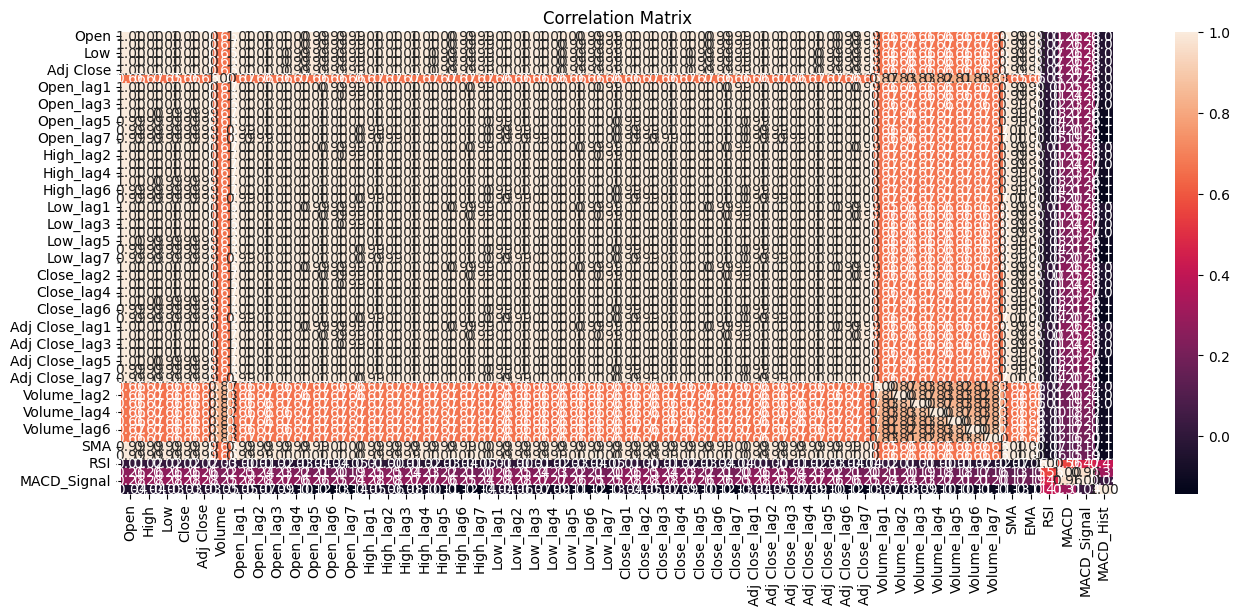

In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

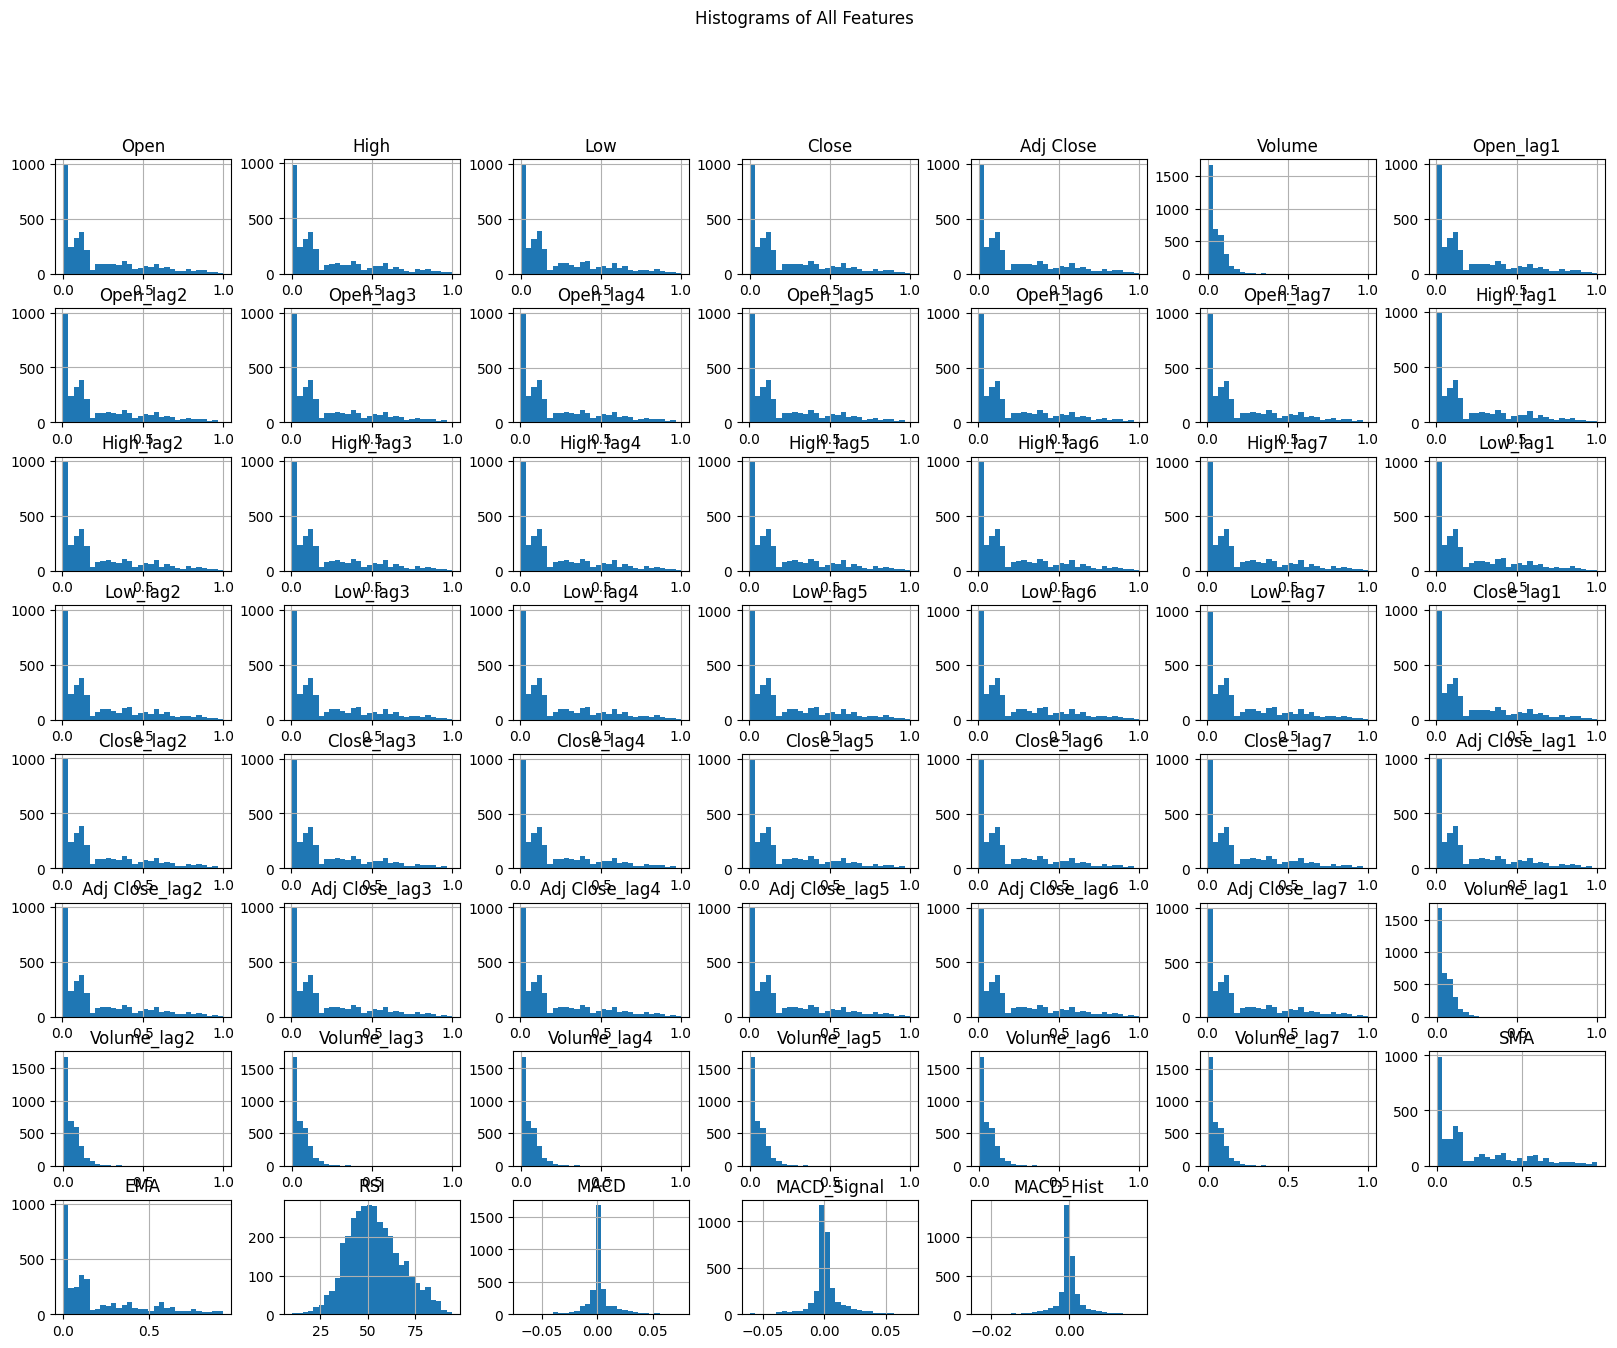

In [ ]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

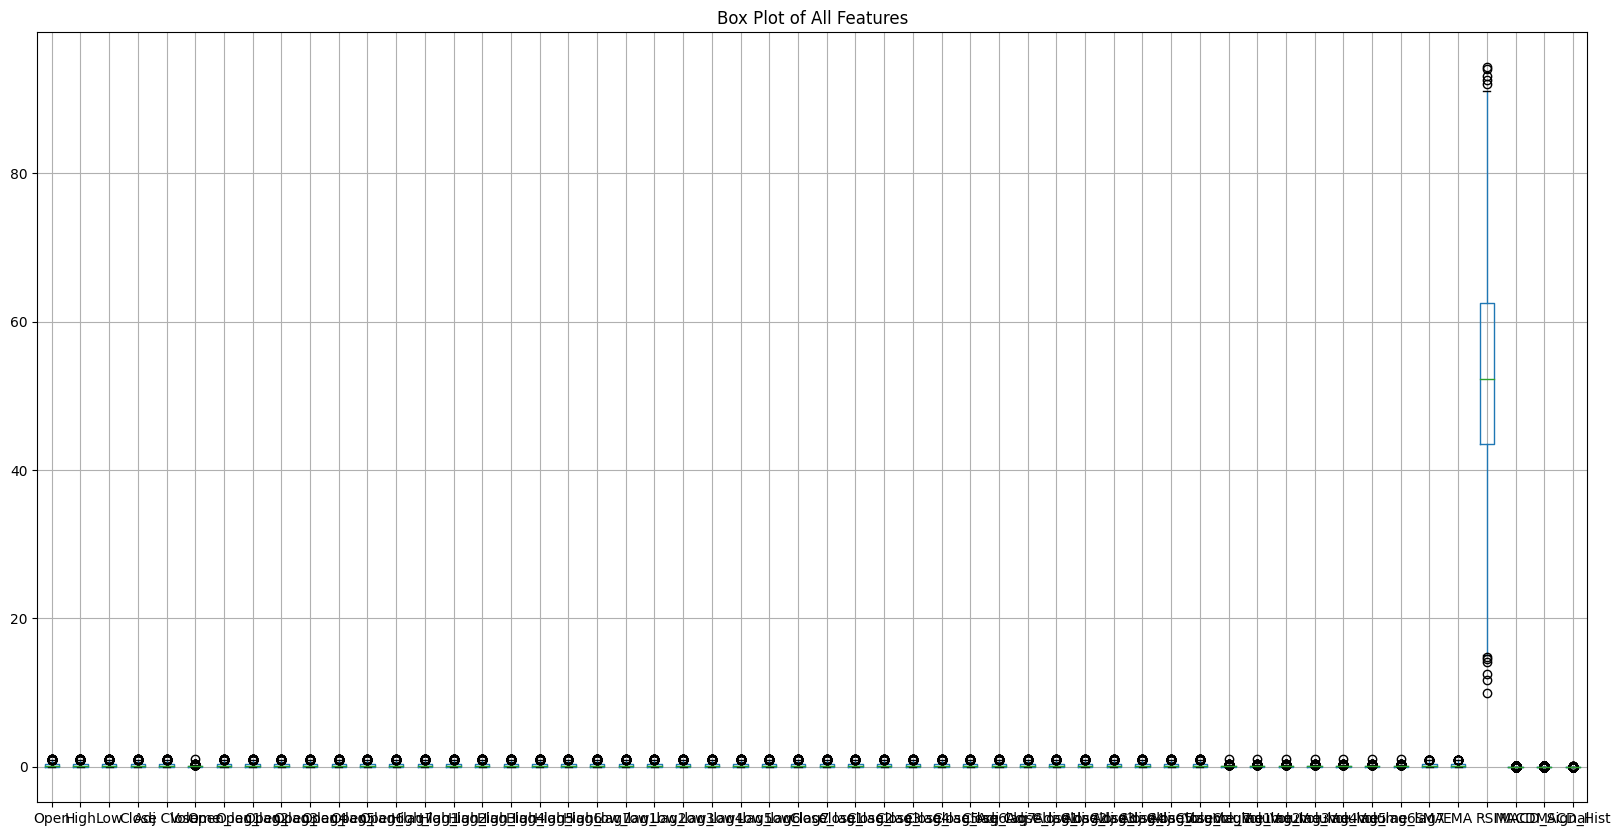

In [ ]:
# Box plots
plt.figure(figsize=(20, 10))
df.boxplot()
plt.title('Box Plot of All Features')
plt.show()

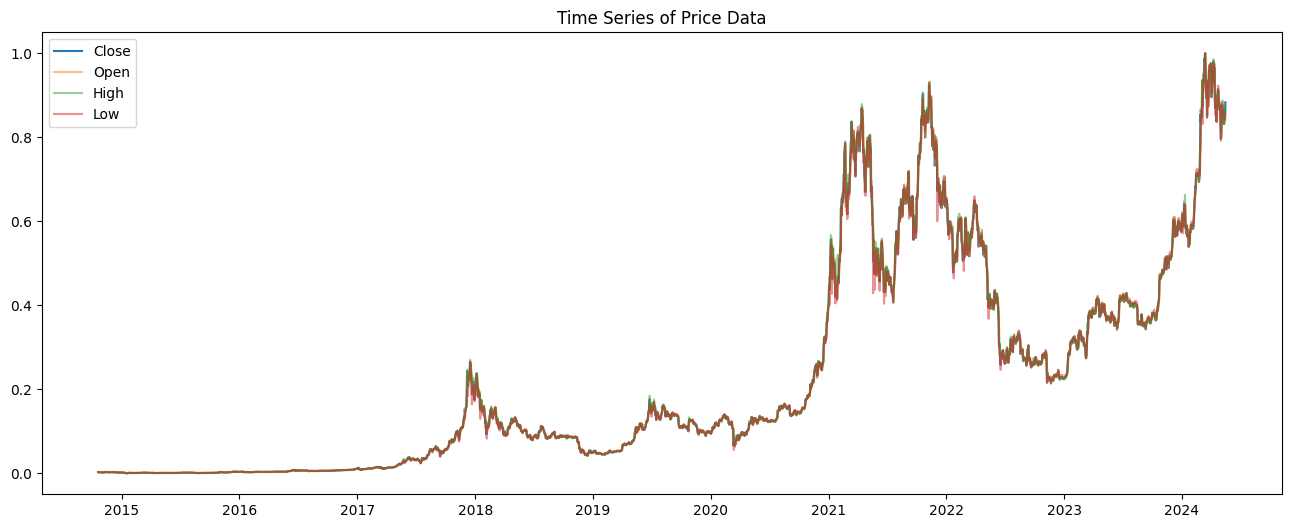

In [ ]:
# Time series plots
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Open'], label='Open', alpha=0.5)
plt.plot(df.index, df['High'], label='High', alpha=0.5)
plt.plot(df.index, df['Low'], label='Low', alpha=0.5)
plt.legend()
plt.title('Time Series of Price Data')
plt.show()

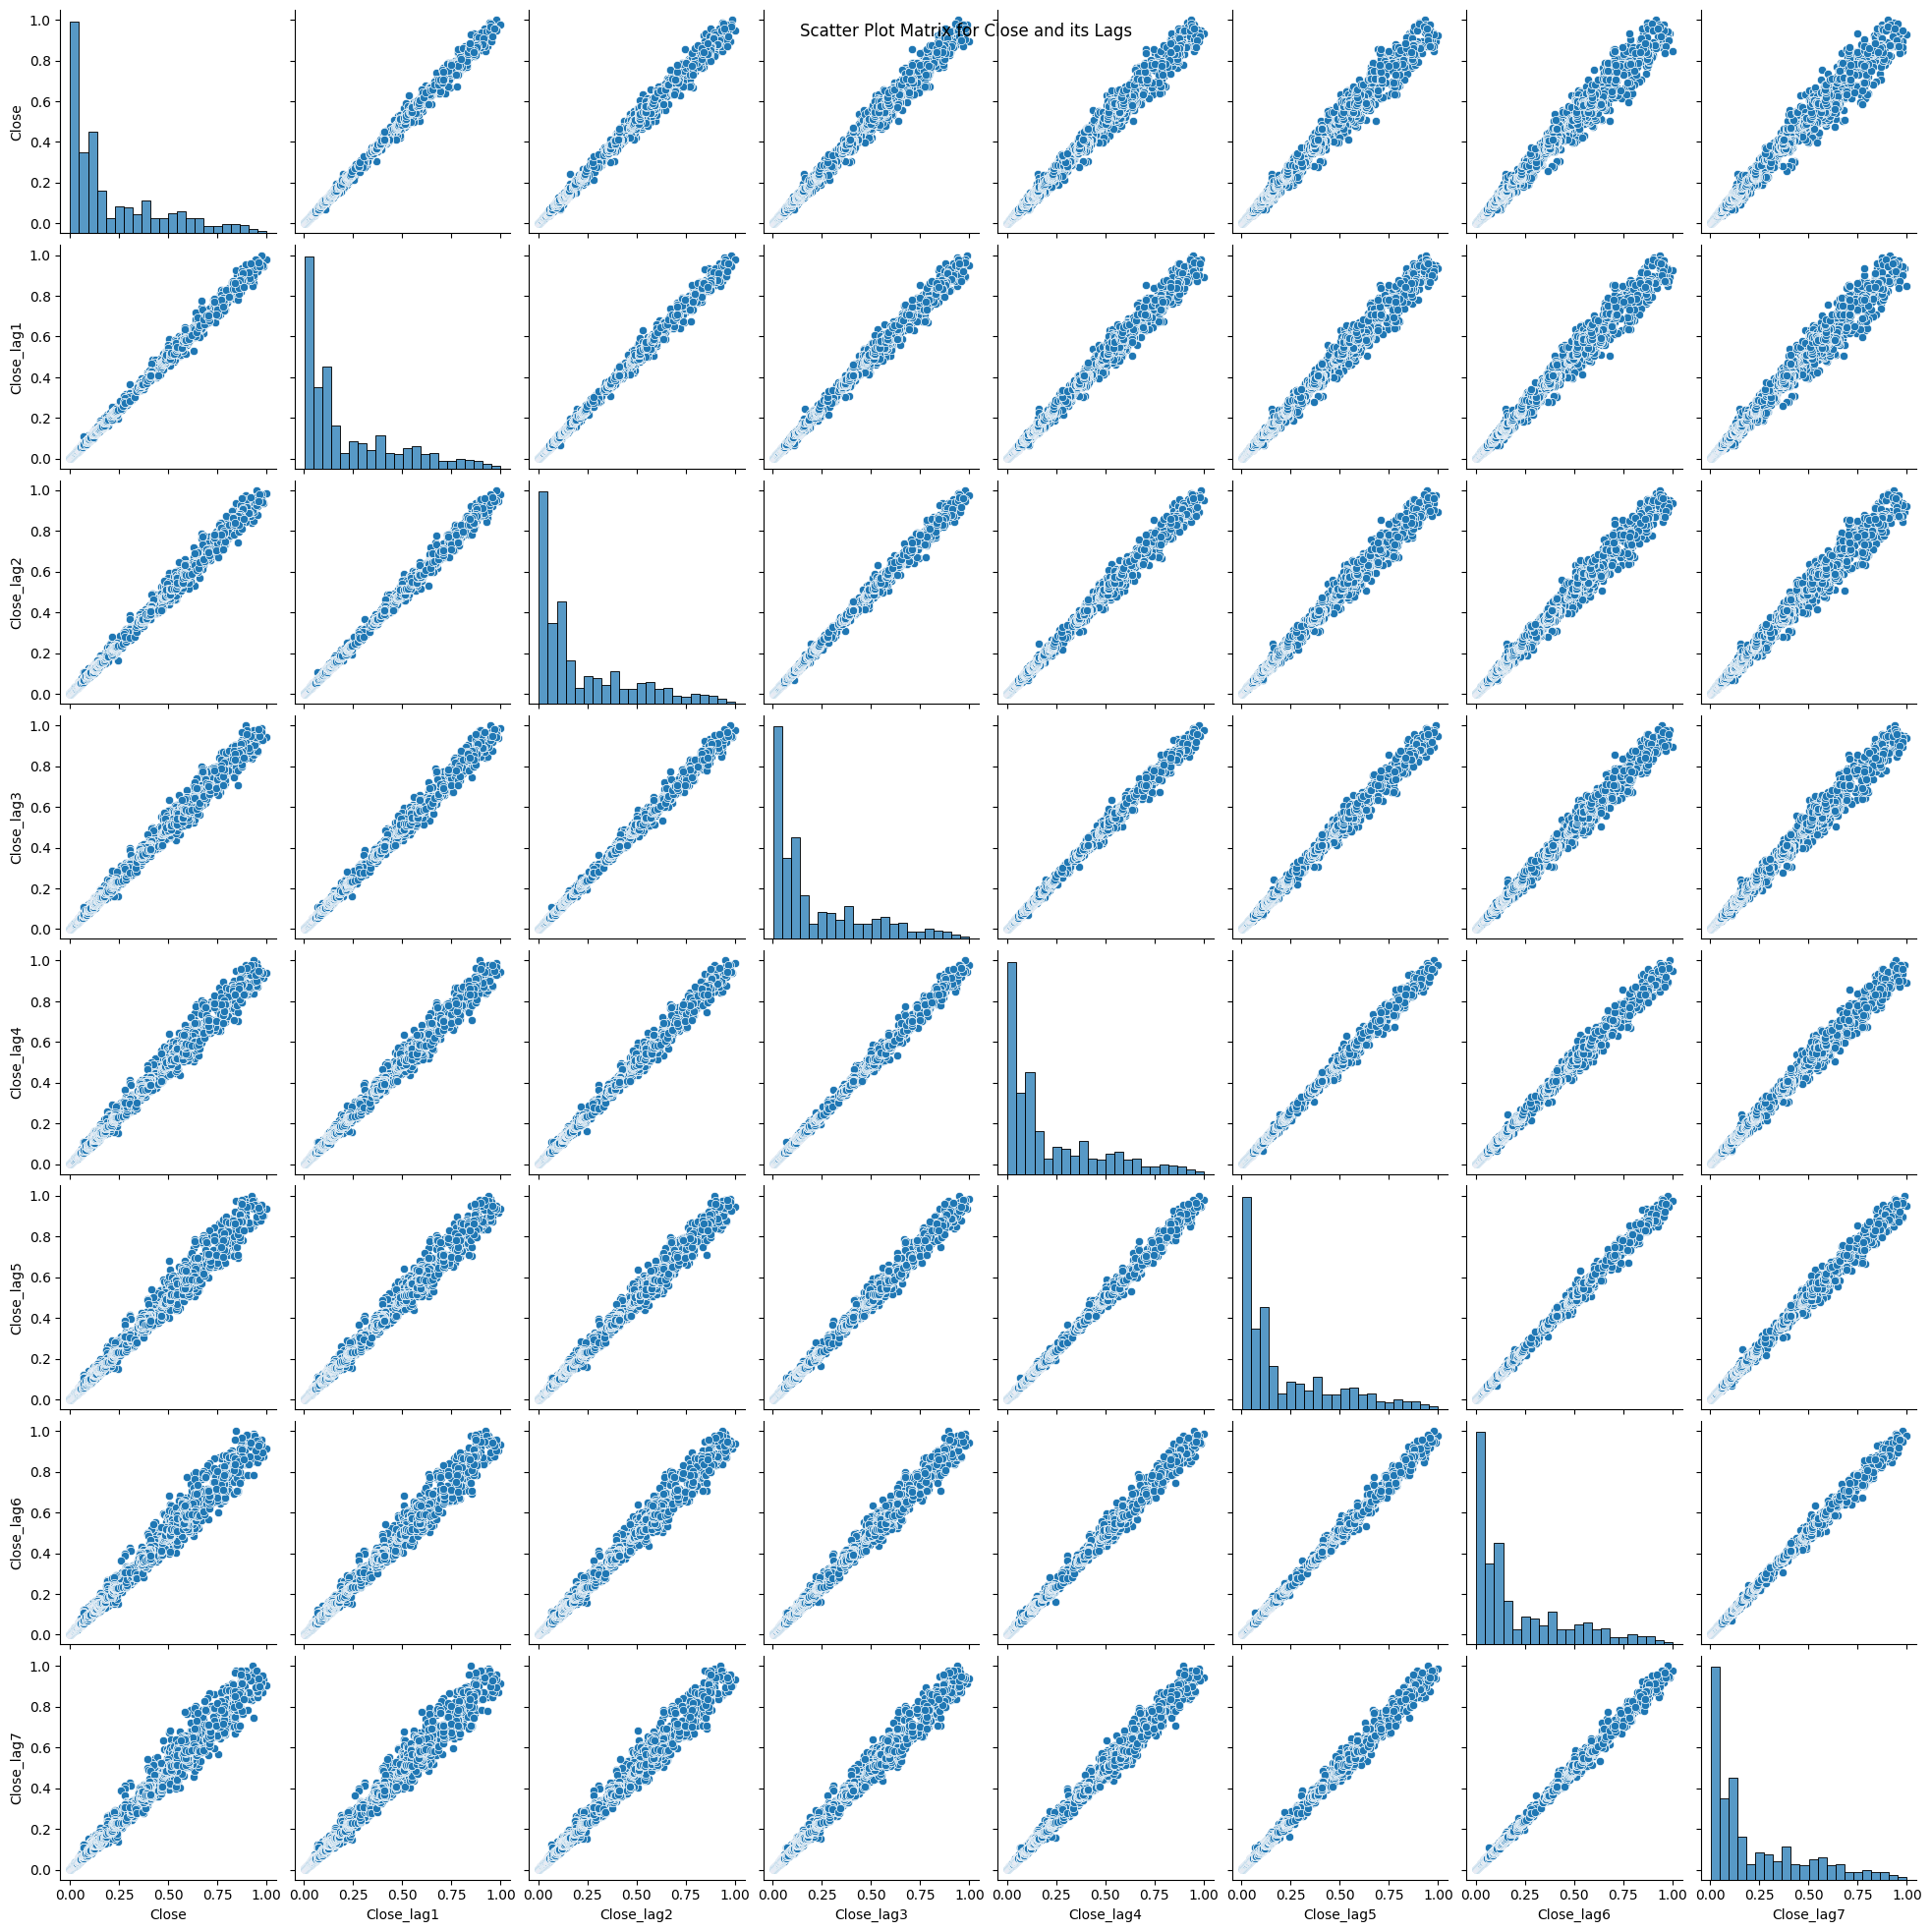

In [ ]:
# Scatter plots for some lagged features and the target variable 'Close'
sns.pairplot(df[['Close', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6', 'Close_lag7']])
plt.suptitle('Scatter Plot Matrix for Close and its Lags')
plt.show()

# **Model Development**

In [ ]:
# Prepare the data for LSTM and Transformer
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Define the sequence length
seq_length = 30

In [ ]:
# Select the target feature
target_feature = 'Close'

In [ ]:
# Create sequences
X, y = create_sequences(df[target_feature].values, seq_length)

In [ ]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2772, 30) (2772,) (694, 30) (694,)


In [ ]:
# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model

In [ ]:
# Define the LSTM model
def create_lstm_model(input_shape, units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Create the LSTM model
lstm_model = create_lstm_model((seq_length, 1))

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Loss: {lstm_loss}')

Epoch 1/50
70/70 [==============================] - 7s 45ms/step - loss: 9.5651e-04 - val_loss: 0.0042
Epoch 2/50
70/70 [==============================] - 3s 44ms/step - loss: 1.7849e-04 - val_loss: 0.0031
Epoch 3/50
70/70 [==============================] - 3s 43ms/step - loss: 1.6200e-04 - val_loss: 0.0068
Epoch 4/50
70/70 [==============================] - 2s 32ms/step - loss: 1.5298e-04 - val_loss: 0.0037
Epoch 5/50
70/70 [==============================] - 2s 32ms/step - loss: 1.1593e-04 - val_loss: 0.0029
Epoch 6/50
70/70 [==============================] - 2s 32ms/step - loss: 1.1307e-04 - val_loss: 0.0054
Epoch 7/50
70/70 [==============================] - 2s 32ms/step - loss: 1.1105e-04 - val_loss: 0.0040
Epoch 8/50
70/70 [==============================] - 4s 53ms/step - loss: 1.3030e-04 - val_loss: 0.0022
Epoch 9/50
70/70 [==============================] - 2s 31ms/step - loss: 1.2326e-04 - val_loss: 0.0072
Epoch 10/50
70/70 [==============================] - 2s 32ms/step - loss:

In [ ]:
# Define hyperparameters for random search
units_list = [50, 100]
dropout_rate_list = [0.2, 0.3]
batch_size_list = [32, 64]
epochs_list = [50, 100]

In [ ]:
best_loss = float('inf')
best_params = None
best_model = None

In [40]:
for units in units_list:
    for dropout_rate in dropout_rate_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                print(f'Training model with units={units}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}')
                model = create_lstm_model((seq_length, 1), units, dropout_rate)
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
                loss = model.evaluate(X_test, y_test, verbose=0)
                print(f'Loss: {loss}')
                if loss < best_loss:
                    best_loss = loss
                    best_params = (units, dropout_rate, batch_size, epochs)
                    best_model = model

print(f'Best parameters: units={best_params[0]}, dropout_rate={best_params[1]}, batch_size={best_params[2]}, epochs={best_params[3]}')
print(f'Best loss: {best_loss}')

Training model with units=50, dropout_rate=0.2, batch_size=32, epochs=50
Loss: 0.000520348665304482
Training model with units=50, dropout_rate=0.2, batch_size=32, epochs=100
Loss: 0.0002907149610109627
Training model with units=50, dropout_rate=0.2, batch_size=64, epochs=50
Loss: 0.0008723547798581421
Training model with units=50, dropout_rate=0.2, batch_size=64, epochs=100
Loss: 0.001819800236262381
Training model with units=50, dropout_rate=0.3, batch_size=32, epochs=50
Loss: 0.0012775252107530832
Training model with units=50, dropout_rate=0.3, batch_size=32, epochs=100
Loss: 0.0005674960557371378
Training model with units=50, dropout_rate=0.3, batch_size=64, epochs=50
Loss: 0.0021039971616119146
Training model with units=50, dropout_rate=0.3, batch_size=64, epochs=100
Loss: 0.0015133735723793507
Training model with units=100, dropout_rate=0.2, batch_size=32, epochs=50
Loss: 0.00047548467409797013
Training model with units=100, dropout_rate=0.2, batch_size=32, epochs=100
Loss: 0.0002

In [41]:
from tensorflow.keras.models import load_model

lstm_model_path = 'best_lstm_model.h5'
best_model.save(lstm_model_path)
print(f'LSTM model saved to {lstm_model_path}')

LSTM model saved to best_lstm_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Load the best LSTM model
lstm_model_path="/content/best_lstm_model.h5"
loaded_lstm_model = load_model(lstm_model_path)
print('LSTM model loaded successfully')

LSTM model loaded successfully


# Transformer model

In [43]:
# Define the Transformer model
def create_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, dropout=0.2, mlp_units=[128]):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(x, x)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = tf.keras.layers.Dense(ff_dim, activation="relu")(x)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [44]:
transformer_model = create_transformer_model((seq_length, 1))

In [45]:
# Train the models
transformer_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
70/70 [==============================] - 31s 313ms/step - loss: 0.0053 - val_loss: 0.3140
Epoch 2/50
70/70 [==============================] - 22s 318ms/step - loss: 0.0039 - val_loss: 0.3036
Epoch 3/50
70/70 [==============================] - 20s 286ms/step - loss: 0.0039 - val_loss: 0.3029
Epoch 4/50
70/70 [==============================] - 21s 293ms/step - loss: 0.0039 - val_loss: 0.3035
Epoch 5/50
70/70 [==============================] - 21s 294ms/step - loss: 0.0039 - val_loss: 0.3034
Epoch 6/50
70/70 [==============================] - 22s 313ms/step - loss: 0.0039 - val_loss: 0.3041
Epoch 7/50
70/70 [==============================] - 21s 295ms/step - loss: 0.0039 - val_loss: 0.3025
Epoch 8/50
70/70 [==============================] - 21s 298ms/step - loss: 0.0039 - val_loss: 0.3026
Epoch 9/50
70/70 [==============================] - 22s 310ms/step - loss: 0.0039 - val_loss: 0.3027
Epoch 10/50
70/70 [==============================] - 21s 296ms/step - loss: 0.0039 - val_lo

# **Evaluation**

# Step 1: Evaluate the Model

In [46]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse, predictions

In [47]:
# Evaluate the loaded LSTM model
lstm_mae, lstm_mse, lstm_rmse, lstm_predictions = evaluate_model(loaded_lstm_model, X_test, y_test)
print(f'LSTM Model Evaluation:\nMAE: {lstm_mae}\nMSE: {lstm_mse}\nRMSE: {lstm_rmse}')


22/22 [==============================] - 1s 11ms/step
LSTM Model Evaluation:
MAE: 0.013718907413346046
MSE: 0.0002907150504690418
RMSE: 0.017050368044973157


In [48]:
# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Convert predictions and true values to DataFrame
    df_eval = pd.DataFrame({'True': y_test, 'Predicted': y_pred.flatten()})
    df_eval['Date'] = df.index[-len(y_test):]  # assuming y_test is the last part of df

    # Trading strategy: buy if predicted price for next day is higher than current price, otherwise sell
    df_eval['Return'] = np.where(df_eval['Predicted'].shift(-1) > df_eval['True'], df_eval['True'].pct_change(), -df_eval['True'].pct_change())
    df_eval['Cumulative_Return'] = (1 + df_eval['Return']).cumprod() - 1

    # Calculate profitability
    total_return = df_eval['Cumulative_Return'].iloc[-1]
    mean_return = df_eval['Return'].mean()
    std_return = df_eval['Return'].std()

    return mae, rmse, total_return, mean_return, std_return, df_eval

In [49]:
# Evaluate the loaded LSTM model
mae, rmse, total_return, mean_return, std_return, df_eval = evaluate_model(loaded_lstm_model, X_test, y_test)

print(f'LSTM Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Total Return: {total_return}')
print(f'Mean Return: {mean_return}')
print(f'Standard Deviation of Return: {std_return}')

22/22 [==============================] - 0s 11ms/step
LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.013718907413346046
Root Mean Squared Error (RMSE): 0.017050368044973157
Total Return: 1.7024426801582138
Mean Return: 0.0017873079024544368
Standard Deviation of Return: 0.026557040368628545


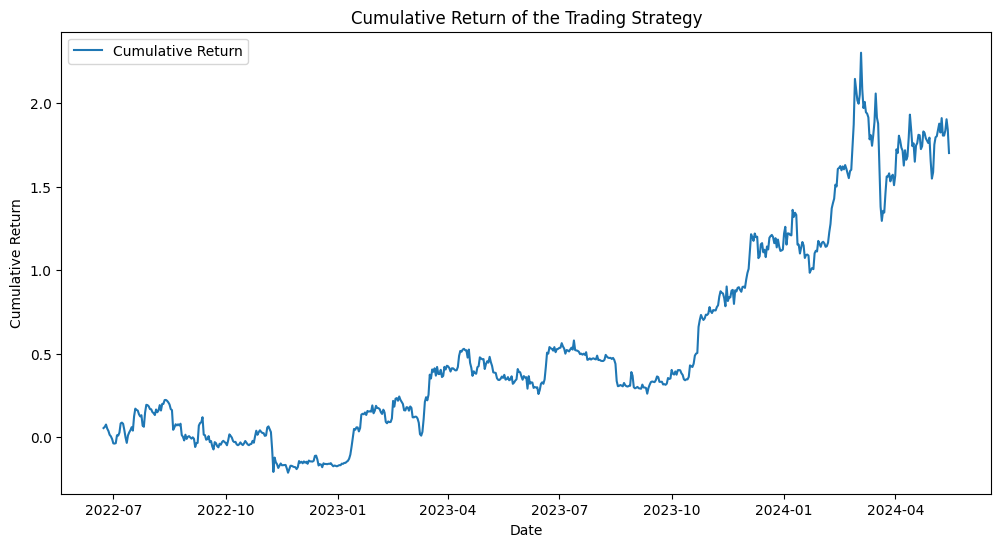

In [50]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_eval['Date'], df_eval['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.legend()
plt.show()

# **Evaluation**

In [51]:
# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Separate test dataset for evaluation

In [52]:
test_file_path = '/content/BTC-USD_test.csv'
test_df = pd.read_csv(test_file_path)

In [53]:
# Convert 'Date' column to datetime and set it as index
test_df['Date'] = pd.to_datetime(test_df['Date'], errors='coerce')
test_df.set_index('Date', inplace=True)
test_df.fillna(0, inplace=True)

In [54]:
# Identify missing values
missing_values = test_df.isnull().sum()
missing_values

Unnamed: 0        0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         0
Open_lag2         0
Open_lag3         0
Open_lag4         0
Open_lag5         0
Open_lag6         0
Open_lag7         0
High_lag1         0
High_lag2         0
High_lag3         0
High_lag4         0
High_lag5         0
High_lag6         0
High_lag7         0
Low_lag1          0
Low_lag2          0
Low_lag3          0
Low_lag4          0
Low_lag5          0
Low_lag6          0
Low_lag7          0
Close_lag1        0
Close_lag2        0
Close_lag3        0
Close_lag4        0
Close_lag5        0
Close_lag6        0
Close_lag7        0
Adj Close_lag1    0
Adj Close_lag2    0
Adj Close_lag3    0
Adj Close_lag4    0
Adj Close_lag5    0
Adj Close_lag6    0
Adj Close_lag7    0
Volume_lag1       0
Volume_lag2       0
Volume_lag3       0
Volume_lag4       0
Volume_lag5       0
Volume_lag6       0
Volume_lag7       0
dtype: int64

In [55]:
test_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-10,2823,30110.33008,30245.80859,28978.14648,29083.80469,29083.80469,2.986748e+10,30215.27930,31151.48047,31371.74219,...,29906.66211,29832.91406,29704.39063,2.169200e+10,3.024206e+10,4.077097e+10,3.194734e+10,1.726409e+10,1.658837e+10,2.617555e+10
2022-06-11,2824,29084.66602,29401.91602,28236.21289,28360.81055,28360.81055,2.724657e+10,30110.33008,30215.27930,31151.48047,...,31370.67188,29906.66211,29832.91406,2.986748e+10,2.169200e+10,3.024206e+10,4.077097e+10,3.194734e+10,1.726409e+10,1.658837e+10
2022-06-12,2825,28373.51367,28502.68555,26762.64844,26762.64844,26762.64844,3.416322e+10,29084.66602,30110.33008,30215.27930,...,31155.47852,31370.67188,29906.66211,2.724657e+10,2.986748e+10,2.169200e+10,3.024206e+10,4.077097e+10,3.194734e+10,1.726409e+10
2022-06-13,2826,26737.57813,26795.58984,22141.25781,22487.38867,22487.38867,6.820456e+10,28373.51367,29084.66602,30110.33008,...,30214.35547,31155.47852,31370.67188,3.416322e+10,2.724657e+10,2.986748e+10,2.169200e+10,3.024206e+10,4.077097e+10,3.194734e+10
2022-06-14,2827,22487.98633,23018.95117,20950.81836,22206.79297,22206.79297,5.091358e+10,26737.57813,28373.51367,29084.66602,...,30111.99805,30214.35547,31155.47852,6.820456e+10,3.416322e+10,2.724657e+10,2.986748e+10,2.169200e+10,3.024206e+10,4.077097e+10


In [56]:
# Normalize the data
scaler = MinMaxScaler()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] + \
                 [f'{col}_lag{lag}' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] for lag in range(1, 8)]

test_df[scaled_columns] = scaler.fit_transform(test_df[scaled_columns])

In [57]:
# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [58]:
# Define the sequence length
seq_length = 30
target_feature = 'Close'

In [59]:
# Create sequences from the test data
X_test, y_test = create_sequences(test_df[target_feature].values, seq_length)

In [60]:
# Load the best LSTM model
lstm_model_path = "/content/best_lstm_model.h5"
loaded_lstm_model = load_model(lstm_model_path)

In [61]:
# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test, df):
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Convert predictions and true values to DataFrame
    df_eval = pd.DataFrame({'True': y_test, 'Predicted': y_pred.flatten()})
    df_eval['Date'] = df.index[-len(y_test):]  # assuming y_test is the last part of df

    # Trading strategy: buy if predicted price for next day is higher than current price, otherwise sell
    df_eval['Return'] = np.where(df_eval['Predicted'].shift(-1) > df_eval['True'], df_eval['True'].pct_change(), -df_eval['True'].pct_change())

    # Remove any NaN or infinite values in returns
    df_eval['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_eval.dropna(subset=['Return'], inplace=True)

    # Calculate cumulative return
    df_eval['Cumulative_Return'] = (1 + df_eval['Return']).cumprod() - 1

    # Remove any NaN or infinite values in cumulative return
    df_eval['Cumulative_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_eval.dropna(subset=['Cumulative_Return'], inplace=True)

    # Calculate profitability
    total_return = df_eval['Cumulative_Return'].iloc[-1] if not df_eval.empty else 0
    mean_return = df_eval['Return'].mean() if not df_eval.empty else 0
    std_return = df_eval['Return'].std() if not df_eval.empty else 0

    return mae, rmse, total_return, mean_return, std_return, df_eval

In [62]:
# Evaluate the loaded LSTM model
mae, rmse, total_return, mean_return, std_return, df_eval = evaluate_model(loaded_lstm_model, X_test, y_test, test_df)

print(f'LSTM Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Total Return: {total_return}')
print(f'Mean Return: {mean_return}')
print(f'Standard Deviation of Return: {std_return}')


22/22 [==============================] - 1s 14ms/step
LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.012764688771817754
Root Mean Squared Error (RMSE): 0.01869392803034665
Total Return: -1.0
Mean Return: -0.056603735590008517
Standard Deviation of Return: 0.7127042406933067


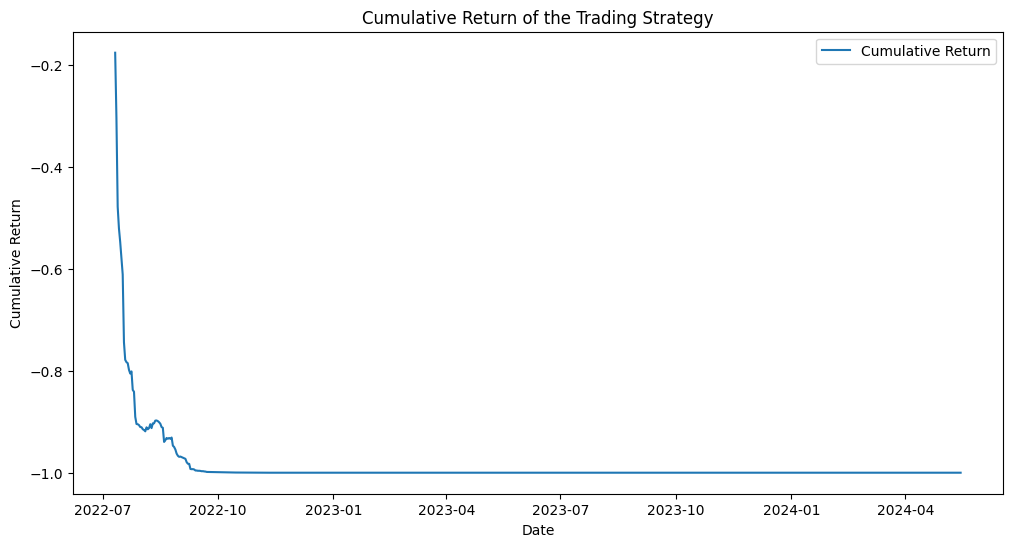

In [63]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_eval['Date'], df_eval['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.legend()
plt.show()